lab 6 12 вариант


In [661]:
# импортируем библиотеку
import pandas as pd
# применим функцию read_csv() и посмотрим на первые три записи файла train.csv
train = pd.read_csv('sample_data/train.csv')
train.head(3)

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75


In [662]:
# сделаем то же самое с файлом test.csv
test = pd.read_csv('sample_data/test.csv')
test.head(3)

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
0,805,Tejas,U.S.A.,2012,Dominican Republic,Presidio,70%,"4- B,S,C,V","molasses, caramel",3.5
1,2108,Seahorse,U.S.A.,2018,Dominican Republic,Zorzal,70%,"2- B,S","earthy, mild fruit, sticky",3.0
2,1474,Bahen & Co.,Australia,2015,Papua New Guinea,Papua New Guinea,70%,"2- B,S","smoke, ham, papaya",3.5


In [663]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ref                               2530 non-null   int64  
 1   company_manufacturer              2530 non-null   object 
 2   company_location                  2530 non-null   object 
 3   review_date                       2530 non-null   int64  
 4   country_of_bean_origin            2530 non-null   object 
 5   specific_bean_origin_or_bar_name  2530 non-null   object 
 6   cocoa_percent                     2530 non-null   object 
 7   ingredients                       2443 non-null   object 
 8   most_memorable_characteristics    2530 non-null   object 
 9   rating                            2530 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 197.8+ KB


<Axes: xlabel='rating', ylabel='count'>

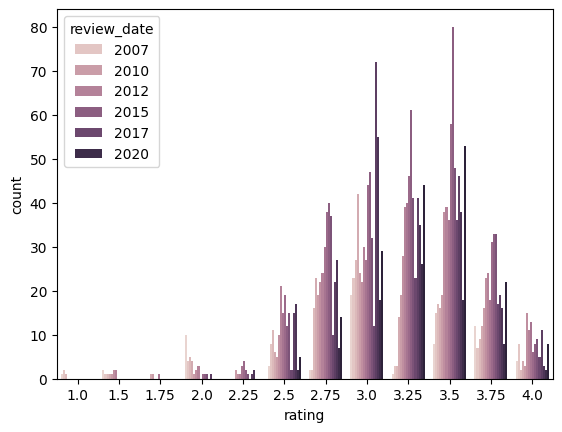

In [664]:
# для построения графиков воспользуемся библиотекой seaborn
import seaborn as sns
# посмотрим насколько значим параметр рэйтинга от даты оценки
# с помощью x и hue мы можем уместить две категориальные переменные на одном графике
sns.countplot(x = 'rating', hue = 'review_date', data = train)

<Axes: xlabel='rating', ylabel='count'>

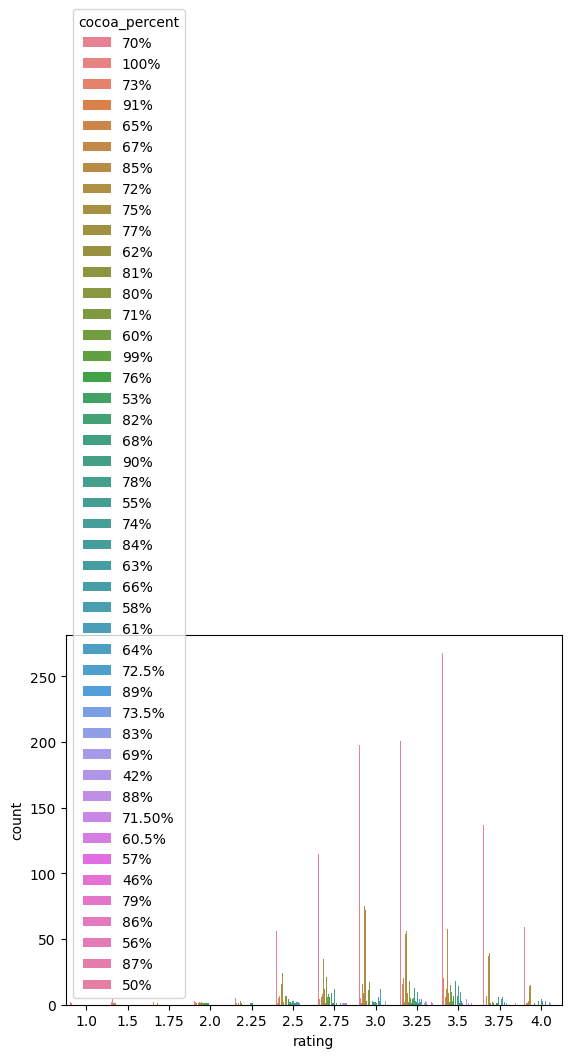

In [665]:
# оценка рейтинга в зависимости от процента содержания какао
sns.countplot(x = 'rating', hue = 'cocoa_percent', data = train)

In [666]:
# выявим пропущенные значения с помощью .isnull() и посчитаем их количество sum()
train.isnull().sum()

,0
ref,0
company_manufacturer,0
company_location,0
review_date,0
country_of_bean_origin,0
specific_bean_origin_or_bar_name,0
cocoa_percent,0
ingredients,87
most_memorable_characteristics,0
rating,0


In [667]:
# удалим  строки с пустыми значениями в какой то из колонок, так как мы не можем построить на них модель и дать оценку
train.dropna(inplace = True)
# посмотрим на результат
train.isnull().sum()

,0
ref,0
company_manufacturer,0
company_location,0
review_date,0
country_of_bean_origin,0
specific_bean_origin_or_bar_name,0
cocoa_percent,0
ingredients,0
most_memorable_characteristics,0
rating,0


In [668]:
# применим one-hot encoding к переменной страны компании с помощью метода .get_dummies()
# get_dummies разбивыает более сложные столбцы на бинарные столбцы по каждому параметру
company_location = pd.get_dummies(train['company_location'], dtype='int', prefix = 'location')
company_manufacturer = pd.get_dummies(train['company_manufacturer'], dtype='int')
country_of_bean_origin = pd.get_dummies(train['country_of_bean_origin'], dtype='int', prefix = 'origin')
specific_bean_origin_or_bar_name = pd.get_dummies(train['specific_bean_origin_or_bar_name'], dtype='int', prefix = 'origin_or_bar_name')
ingredients = pd.get_dummies(train['ingredients'], dtype='int')
most_memorable_characteristics = pd.get_dummies(train['most_memorable_characteristics'], dtype='int')
pd.get_dummies(train).head(3)

,ref,review_date,rating,company_manufacturer_5150,company_manufacturer_A. Morin,company_manufacturer_AMMA,company_manufacturer_Acalli,company_manufacturer_Adi aka Fijiana (Easy In Ltd),company_manufacturer_Aelan,company_manufacturer_Aequare (Gianduja),...,"most_memorable_characteristics_woody, mocha, molasses","most_memorable_characteristics_woody, nutty, off sour note","most_memorable_characteristics_woody, nutty, short","most_memorable_characteristics_woody, red berry, sour","most_memorable_characteristics_woody, red fruit, sour","most_memorable_characteristics_woody, spicy, tobacco","most_memorable_characteristics_woody, sweet, unrefined","most_memorable_characteristics_woody, toast, pepper",most_memorable_characteristics_yellow fruit,"most_memorable_characteristics_yogurt, lemon, licorice"
0,2454,2019,3.25,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2458,2019,3.50,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2454,2019,3.75,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [669]:
train = pd.concat(
    [
        train, company_location, company_manufacturer, country_of_bean_origin, specific_bean_origin_or_bar_name,
        ingredients, most_memorable_characteristics
    ], axis = 1)

In [670]:
train.drop(
    [
        'company_location', 'company_manufacturer', 'country_of_bean_origin', 'specific_bean_origin_or_bar_name',
        'ingredients', 'most_memorable_characteristics'
    ], axis = 1, inplace = True)
# удалим столбец номера номера записи , он нам не нужен для исследования
train.drop(
    [
        'ref', 'review_date'
    ], axis = 1, inplace = True)
# переведем проценты в дробное число
train['cocoa_percent'] = train['cocoa_percent'].str.rstrip('%').astype(float) / 100.0
train['rating'] = (train['rating']/3.5).astype(int) # будем считать рейтинг>= 3.5 хорошим (1), а ниже - плохим (0)
train.head(5)

,cocoa_percent,rating,location_Amsterdam,location_Argentina,location_Australia,location_Austria,location_Belgium,location_Bolivia,location_Brazil,location_Canada,...,"woody, mocha, molasses","woody, nutty, off sour note","woody, nutty, short","woody, red berry, sour","woody, red fruit, sour","woody, spicy, tobacco","woody, sweet, unrefined","woody, toast, pepper",yellow fruit,"yogurt, lemon, licorice"
0,0.76,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.76,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.76,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.68,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.72,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [671]:
# импортируем класс StandardScaler
from sklearn.preprocessing import StandardScaler
# создадим объект этого класса
scaler = StandardScaler()
# выберем те столбцы, которые мы хотим масштабировать
cols_to_scale = ['cocoa_percent']
scaler.fit(train[cols_to_scale])
train[cols_to_scale] = scaler.transform(train[cols_to_scale])
# рассчитаем среднее арифметическое и СКО для масштабирования данных
# применим их
# посмотрим на результат
train.head(3)

,cocoa_percent,rating,location_Amsterdam,location_Argentina,location_Australia,location_Austria,location_Belgium,location_Bolivia,location_Brazil,location_Canada,...,"woody, mocha, molasses","woody, nutty, off sour note","woody, nutty, short","woody, red berry, sour","woody, red fruit, sour","woody, spicy, tobacco","woody, sweet, unrefined","woody, toast, pepper",yellow fruit,"yogurt, lemon, licorice"
0,0.873419,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.873419,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.873419,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [672]:
print(train.columns)

Index(['cocoa_percent', 'rating', 'location_Amsterdam', 'location_Argentina',
       'location_Australia', 'location_Austria', 'location_Belgium',
       'location_Bolivia', 'location_Brazil', 'location_Canada',
       ...
       'woody, mocha, molasses', 'woody, nutty, off sour note',
       'woody, nutty, short', 'woody, red berry, sour',
       'woody, red fruit, sour', 'woody, spicy, tobacco',
       'woody, sweet, unrefined', 'woody, toast, pepper', 'yellow fruit',
       'yogurt, lemon, licorice'],
      dtype='object', length=4664)


In [673]:

#train.columns = train.columns.map(str)
train.columns.map(str)

Index(['cocoa_percent', 'rating', 'location_Amsterdam', 'location_Argentina',
       'location_Australia', 'location_Austria', 'location_Belgium',
       'location_Bolivia', 'location_Brazil', 'location_Canada',
       ...
       'woody, mocha, molasses', 'woody, nutty, off sour note',
       'woody, nutty, short', 'woody, red berry, sour',
       'woody, red fruit, sour', 'woody, spicy, tobacco',
       'woody, sweet, unrefined', 'woody, toast, pepper', 'yellow fruit',
       'yogurt, lemon, licorice'],
      dtype='object', length=4664)

In [674]:
# поместим в X_train все кроме столбца rating
X_train = train.drop('rating', axis = 1)
# столбец 'rating' станет нашей целевой переменной (y_train)
y_train = train['rating']
X_train.head(3)

,cocoa_percent,location_Amsterdam,location_Argentina,location_Australia,location_Austria,location_Belgium,location_Bolivia,location_Brazil,location_Canada,location_Chile,...,"woody, mocha, molasses","woody, nutty, off sour note","woody, nutty, short","woody, red berry, sour","woody, red fruit, sour","woody, spicy, tobacco","woody, sweet, unrefined","woody, toast, pepper",yellow fruit,"yogurt, lemon, licorice"
0,0.873419,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.873419,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.873419,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [675]:
# импортируем логистическую регрессию из модуля linear_model библиотеки sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# создадим объект этого класса и запишем его в переменную model
model = LogisticRegression()
# обучим нашу модель
X_train = pd.get_dummies(X_train)
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.2, random_state=100
)
model.fit(X_train, y_train)

LogisticRegression()

In [676]:
# сделаем предсказание класса на обучающей выборке
y_pred_train = model.predict(X_train)

In [677]:
# построим матрицу ошибок
from sklearn.metrics import confusion_matrix
# передадим ей фактические и прогнозные значения
conf_matrix = confusion_matrix(y_train, y_pred_train)
# преобразуем в датафрейм
conf_matrix_df = pd.DataFrame(conf_matrix)
conf_matrix_df

,0,1
0,1161,18
1,66,709


In [678]:
conf_matrix_labels = pd.DataFrame(conf_matrix, columns = ['прогноз низкий рейтинг', 'прогноз высокий рейтинг'], index = ['Факт низкий рейтинг', 'Факт высокий рейтинг'])
conf_matrix_labels

,прогноз низкий рейтинг,прогноз высокий рейтинг
Факт низкий рейтинг,1161,18
Факт высокий рейтинг,66,709


In [679]:
# рассчитаем метрику accuracy вручную
round((1161+709)/(1161 + 18 + 66 + 709), 3)

0.957

In [680]:
# импортируем метрику accuracy из sklearn
from sklearn.metrics import accuracy_score
# так же передадим ей фактические и прогнозные значения
model_accuracy = accuracy_score(y_train, y_pred_train)
# округлим до трех знаков после запятой
round(model_accuracy, 3)

0.957

In [681]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ref                               506 non-null    int64  
 1   company_manufacturer              506 non-null    object 
 2   company_location                  506 non-null    object 
 3   review_date                       506 non-null    int64  
 4   country_of_bean_origin            506 non-null    object 
 5   specific_bean_origin_or_bar_name  506 non-null    object 
 6   cocoa_percent                     506 non-null    object 
 7   ingredients                       485 non-null    object 
 8   most_memorable_characteristics    506 non-null    object 
 9   rating                            506 non-null    float64
dtypes: float64(1), int64(2), object(7)
memory usage: 39.7+ KB


In [682]:
import numpy as np
# для начала дадим датасету привычное название X_test
X_test = test

# Для того чтобы наша модель смогла работать с тестовой выборкой нам
# нужно таким же образом обработать и эти данные.

# заполним пропуски в переменных ingredients случайным
possible_values = X_test['ingredients'].dropna().unique()
X_test['ingredients'] = X_test['ingredients'].apply(
    lambda x: x if pd.notnull(x) else np.random.choice(possible_values)
)
# выполним one-hot encoding категориальных переменных
company_location = pd.get_dummies(X_test['company_location'], dtype='int', prefix = 'location')
company_manufacturer = pd.get_dummies(X_test['company_manufacturer'], dtype='int')
country_of_bean_origin = pd.get_dummies(X_test['country_of_bean_origin'], dtype='int', prefix = 'origin')
specific_bean_origin_or_bar_name = pd.get_dummies(X_test['specific_bean_origin_or_bar_name'], dtype='int', prefix = 'origin_or_bar_name')
ingredients = pd.get_dummies(X_test['ingredients'], dtype='int')
most_memorable_characteristics = pd.get_dummies(X_test['most_memorable_characteristics'], dtype='int')
# присоединим новые столбцы к исходному датафрейму
X_test = pd.concat(
    [
        X_test, company_location, company_manufacturer, country_of_bean_origin, specific_bean_origin_or_bar_name,
        ingredients, most_memorable_characteristics
    ], axis = 1)
# удалим столбец номера номера записи , он нам не нужен для исследования
X_test.drop(
    [
        'company_location', 'company_manufacturer', 'country_of_bean_origin', 'specific_bean_origin_or_bar_name',
        'ingredients', 'most_memorable_characteristics'
    ], axis = 1, inplace = True)
X_test.drop(
    [
        'ref', 'review_date'
    ], axis = 1, inplace = True)

# переведем проценты в дробное число
X_test['cocoa_percent'] = X_test['cocoa_percent'].str.rstrip('%').astype(float) / 100.0
X_test['rating'] = (X_test['rating']/3.5).astype(int) # будем считать рейтинг>= 3.5 хорошим (1), а ниже - плохим (0)

# Убедимся, что порядок колонок одинаков
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

#X_test = X_test.drop('rating', axis = 1)
# посмотрим на результат
X_test.head(3)




,cocoa_percent,location_Amsterdam,location_Argentina,location_Australia,location_Austria,location_Belgium,location_Bolivia,location_Brazil,location_Canada,location_Chile,...,"woody, mocha, molasses","woody, nutty, off sour note","woody, nutty, short","woody, red berry, sour","woody, red fruit, sour","woody, spicy, tobacco","woody, sweet, unrefined","woody, toast, pepper",yellow fruit,"yogurt, lemon, licorice"
0,0.7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.7,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [683]:
# применим среднее арифметическое и СКО обучающей выборки для масштабирования тестовых
#данных
from sklearn.preprocessing import StandardScaler
# создадим объект этого класса

scaler.fit(X_test[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.head(3)

,cocoa_percent,location_Amsterdam,location_Argentina,location_Australia,location_Austria,location_Belgium,location_Bolivia,location_Brazil,location_Canada,location_Chile,...,"woody, mocha, molasses","woody, nutty, off sour note","woody, nutty, short","woody, red berry, sour","woody, red fruit, sour","woody, spicy, tobacco","woody, sweet, unrefined","woody, toast, pepper",yellow fruit,"yogurt, lemon, licorice"
0,-0.23898,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.23898,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.23898,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [684]:
X_test.columns.map(str)

Index(['cocoa_percent', 'location_Amsterdam', 'location_Argentina',
       'location_Australia', 'location_Austria', 'location_Belgium',
       'location_Bolivia', 'location_Brazil', 'location_Canada',
       'location_Chile',
       ...
       'woody, mocha, molasses', 'woody, nutty, off sour note',
       'woody, nutty, short', 'woody, red berry, sour',
       'woody, red fruit, sour', 'woody, spicy, tobacco',
       'woody, sweet, unrefined', 'woody, toast, pepper', 'yellow fruit',
       'yogurt, lemon, licorice'],
      dtype='object', length=4663)

In [685]:
y_pred_test = model.predict(X_test)

In [686]:
# посмотрим на первые 10 прогнозных значений
y_pred_test[:10]


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [689]:
# возьмем индекс bean_type тестовой выборки
ids = test['ref']
# создадим датафрейм из словаря, в котором
# первая пара ключа и значения - это тип бобовых , вторая - прогноз "на тесте"
result = pd.DataFrame({
    'ref': ids,
    'rating': pd.Series(y_pred_test)
})
# посмотрим, что получилось
result.head(5)

,ref,rating
0,805,0
1,2108,0
2,1474,0
3,157,0
4,304,0


In [690]:
# создадим новый файл result.csv с помощью функции to_csv(), удалив при этом индекс
result.to_csv('result.csv', index = False)
# файл будет сохранен в 'Сессионном хранилище' и, если все пройдет успешно, выведем следующий # текст:
print('Файл успешно сохранился в сессионное хранилище!')

Файл успешно сохранился в сессионное хранилище!


Качество модели бинаоной классификации. ROC-кривая

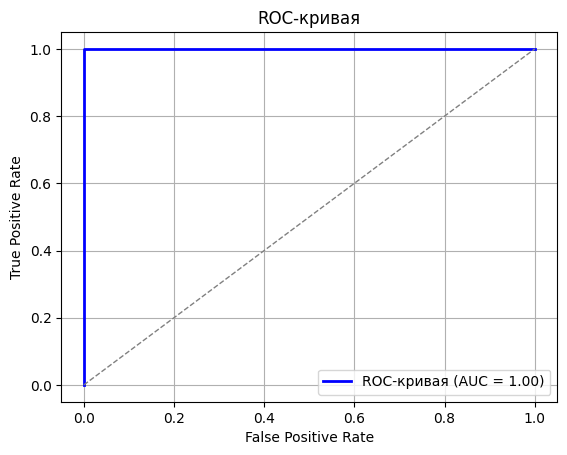

In [695]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# 2. Получаем вероятности принадлежности к классу 1
y_scores = model.predict_proba(X_test)[:, 1]  # только вероятности класса 1

# 3. Строим ROC-кривую
fpr, tpr, thresholds = roc_curve(y_pred_test, y_scores)
roc_auc = auc(fpr, tpr)

# 4. Рисуем
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC-кривая (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # линия случайного выбора
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()